In [220]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline 

In [221]:
df = pd.read_csv('Housing.csv')

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [223]:
df['mainroad'].unique()

array(['yes', 'no'], dtype=object)

In [224]:
df['mainroad'] = df['mainroad'].map({'yes':1, 'no':0})
df['mainroad'] = df['mainroad'].astype(int)

In [225]:
df['guestroom'].unique()

array(['no', 'yes'], dtype=object)

In [226]:
df['guestroom'] = df['guestroom'].map({'yes':1, 'no':0})
df['guestroom'] = df['guestroom'].astype(int)

In [227]:
df['basement'].unique()

array(['no', 'yes'], dtype=object)

In [228]:
df['basement'] = df['basement'].map({'yes':1, 'no':0})
df['basement'] = df['basement'].astype(int)

In [229]:
df['hotwaterheating'].unique()

array(['no', 'yes'], dtype=object)

In [230]:
df['hotwaterheating'] = df['hotwaterheating'].map({'yes':1, 'no':0})
df['hotwaterheating'] = df['hotwaterheating'].astype(int)

In [231]:
df['airconditioning'].unique()

array(['yes', 'no'], dtype=object)

In [232]:
df['airconditioning'] = df['airconditioning'].map({'yes':1, 'no':0})
df['airconditioning'] = df['airconditioning'].astype(int)

In [233]:
df['prefarea'].unique()

array(['yes', 'no'], dtype=object)

In [234]:
df['prefarea'] = df['prefarea'].map({'yes':1, 'no':0})
df['prefarea'] = df['prefarea'].astype(int)

In [235]:
df['furnishingstatus'].unique()

array(['furnished', 'semi-furnished', 'unfurnished'], dtype=object)

In [236]:
mapping = {
    'unfurnished': 0,
    'semi-furnished': 1,
    'furnished': 2
}

df['furnishingstatus'] = df['furnishingstatus'].map(mapping)

In [237]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             545 non-null    int64
 1   area              545 non-null    int64
 2   bedrooms          545 non-null    int64
 3   bathrooms         545 non-null    int64
 4   stories           545 non-null    int64
 5   mainroad          545 non-null    int64
 6   guestroom         545 non-null    int64
 7   basement          545 non-null    int64
 8   hotwaterheating   545 non-null    int64
 9   airconditioning   545 non-null    int64
 10  parking           545 non-null    int64
 11  prefarea          545 non-null    int64
 12  furnishingstatus  545 non-null    int64
dtypes: int64(13)
memory usage: 55.5 KB


In [238]:
## Independent Features 
X = df.drop('price',axis=1)

In [239]:
X

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,7420,4,2,3,1,0,0,0,1,2,1,2
1,8960,4,4,4,1,0,0,0,1,3,0,2
2,9960,3,2,2,1,0,1,0,0,2,1,1
3,7500,4,2,2,1,0,1,0,1,3,1,2
4,7420,4,1,2,1,1,1,0,1,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
540,3000,2,1,1,1,0,1,0,0,2,0,0
541,2400,3,1,1,0,0,0,0,0,0,0,1
542,3620,2,1,1,1,0,0,0,0,0,0,0
543,2910,3,1,1,0,0,0,0,0,0,0,2


In [240]:
## Dependent Features
y = df['price']

In [241]:
from sklearn.model_selection import train_test_split

In [242]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [243]:
from sklearn.linear_model import LinearRegression

In [244]:
reg = LinearRegression()

In [245]:
reg.fit(X_train,y_train)

LinearRegression()

In [246]:
y_pred = reg.predict(X_test)

In [247]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [248]:
print(r2_score(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.6614628548582817
919520.6451757507
1560062846482.4192


In [249]:
residuals = y_test-y_pred
print(residuals)

316   -1.198901e+06
77    -5.859783e+05
360    6.351958e+05
90     1.910167e+06
493   -5.348960e+05
           ...     
172   -1.708637e+06
124   -5.428502e+05
388    2.676996e+05
521    9.240165e+03
503   -4.774231e+05
Name: price, Length: 137, dtype: float64


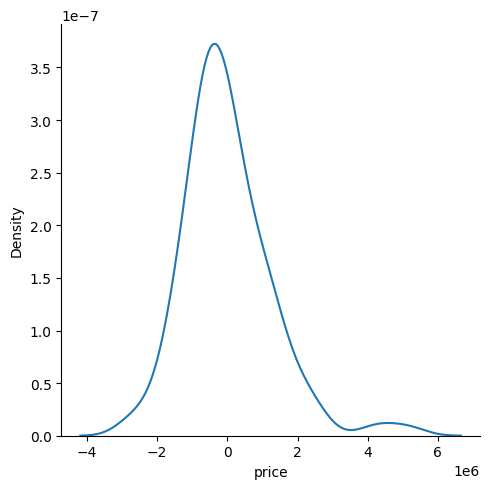

In [250]:
## Plot this Residual
sns.displot(residuals,kind='kde')
plt.show()

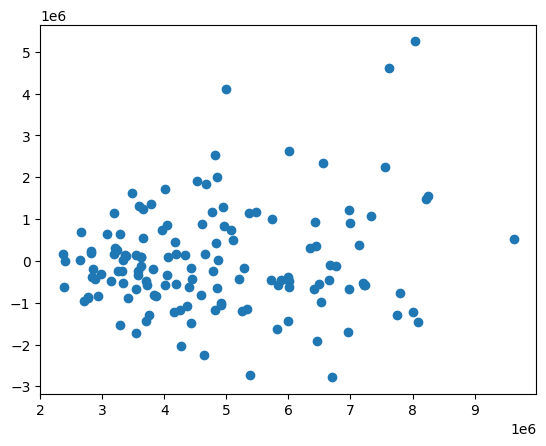

In [251]:
## Scatter Plot with respect to prediction and residuals

plt.scatter(y_pred,residuals)
plt.show()